<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-08-13 06:44:39--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv.15’

survey-data.csv.15  100%[===================>] 152.13M  67.2MB/s    in 2.3s    

2025-08-13 06:44:44 (67.2 MB/s) - ‘survey-data.csv.15’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [ ]:
!pip install pandas 
!pip install matplotlib
!pip install seaborn


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [3]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [4]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [5]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [6]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df

,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [7]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [ ]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


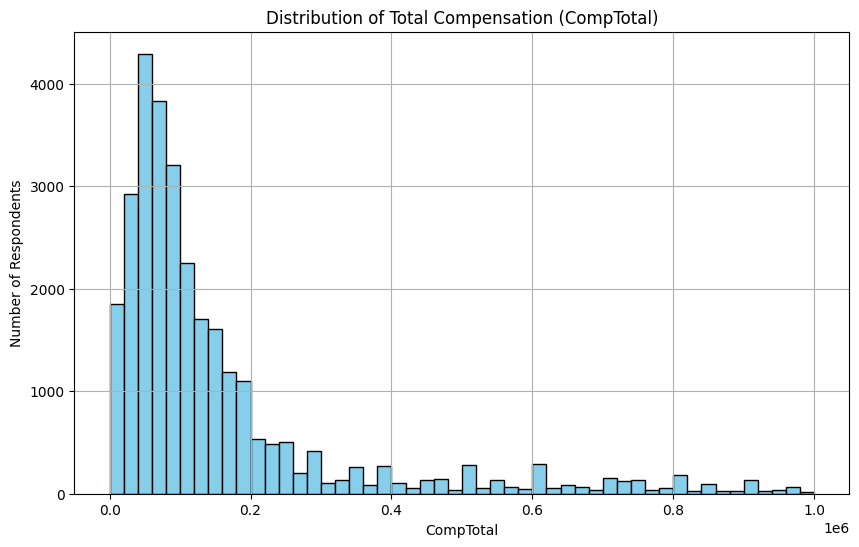

In [10]:
sql_query = """
SELECT CompTotal
FROM main
WHERE CompTotal IS NOT NULL
  AND CompTotal > 0
  AND CompTotal < 1000000;
"""

df_filtered = pd.read_sql_query(sql_query, conn)

plt.figure(figsize=(10, 6))
plt.hist(df_filtered['CompTotal'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Compensation (CompTotal)')
plt.xlabel('CompTotal')
plt.ylabel('Number of Respondents')
plt.grid(True)
plt.show()


**Box Plots**

Plot a box plot of Age.


First we will change the values in the column 'Age' to numeric.

In [11]:
df_copy = pd.read_sql_query("SELECT * FROM main;", conn)

age_map = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': None
}

df_copy['AgeNumeric'] = df_copy['Age'].map(age_map)

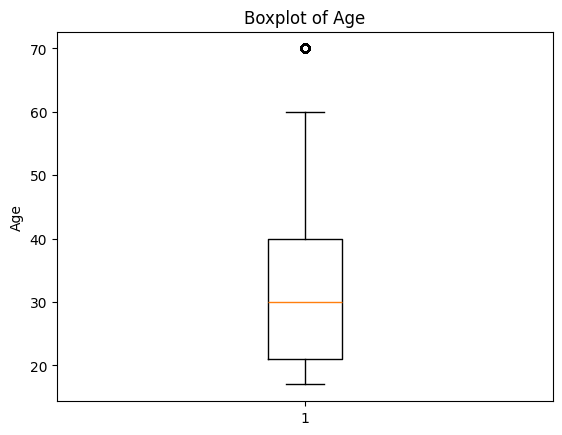

In [12]:
## Write your code here

numeric_ages = df_copy['AgeNumeric'].dropna()

# Plot the boxplot
plt.boxplot(numeric_ages)
plt.ylabel('Age')
plt.title('Boxplot of Age')
plt.show()

### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


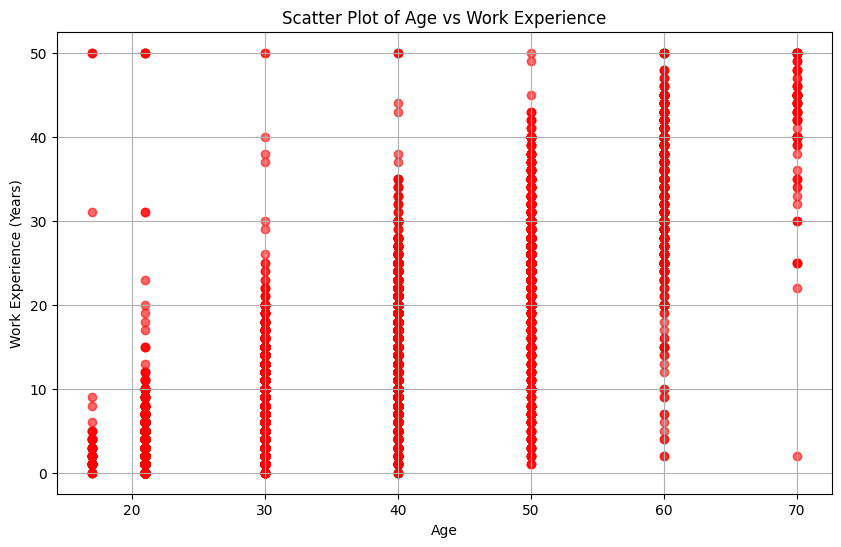

In [13]:
## Write your code here
df_scatter = df_copy[['AgeNumeric', 'WorkExp']].dropna(subset=['AgeNumeric', 'WorkExp'])
plt.figure(figsize=(10,6))
plt.scatter(df_scatter['AgeNumeric'], df_scatter['WorkExp'], alpha=0.6, color='red')
plt.title('Scatter Plot of Age vs Work Experience')
plt.xlabel('Age')
plt.ylabel('Work Experience (Years)')
plt.grid(True)
plt.show()


**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


In [14]:
print(df_copy['TimeSearching'].value_counts())
print(df_copy['Frustration'].value_counts())
print(df_copy['AgeNumeric'].value_counts())

TimeSearching
30-60 minutes a day           10951
15-30 minutes a day            7805
60-120 minutes a day           5275
Less than 15 minutes a day     2689
Over 120 minutes a day         2191
Name: count, dtype: int64
Frustration
None of these                                                                                                                                                                                                                                              2364
Amount of technical debt                                                                                                                                                                                                                                   2067
Amount of technical debt;Reliability of tools/systems used in work                                                                                                                                                                                          831


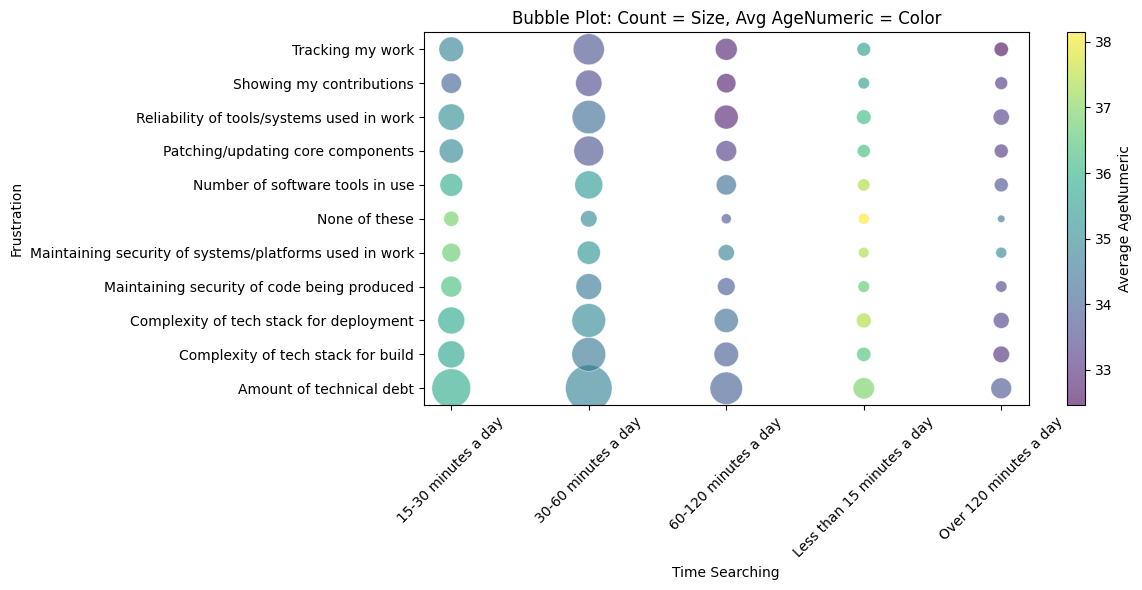

In [15]:
# Step 1: Copy dataframe
df_bubble = df_copy.copy()

# Step 2: Split Frustration column into lists
df_bubble['Frustration'] = df_bubble['Frustration'].str.split(';')

# Step 3: Explode into separate rows
df_bubble = df_bubble.explode('Frustration')

# Step 4: Remove extra spaces
df_bubble['Frustration'] = df_bubble['Frustration'].str.strip()

# Step 5: Aggregate - count for size, avg AgeNumeric for color
agg_df = df_bubble.groupby(['TimeSearching', 'Frustration'], as_index=False).agg(
    count=('AgeNumeric', 'count'),
    avg_age=('AgeNumeric', 'mean')
)

# Step 6: Plot
plt.figure(figsize=(12, 6))
scatter = plt.scatter(
    agg_df['TimeSearching'],
    agg_df['Frustration'],
    s=agg_df['count']/6,       
    c=agg_df['avg_age'],          # color = average age
    cmap='viridis',
    alpha=0.6,
    edgecolors='w',
    linewidth=0.5
)

# Add colorbar for age
cbar = plt.colorbar(scatter)
cbar.set_label('Average AgeNumeric')

# Labels and title
plt.xlabel('Time Searching')
plt.ylabel('Frustration')
plt.title('Bubble Plot: Count = Size, Avg AgeNumeric = Color')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


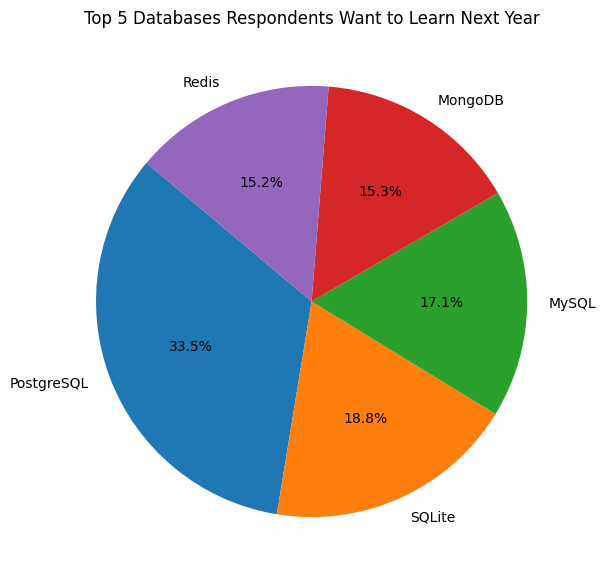

In [16]:
## Write your code here
df_copy = pd.read_sql_query("SELECT * FROM main;", conn)

# Step 1: Copy the column
db_series = df_copy['DatabaseWantToWorkWith'].dropna()

# Step 2: Split multiple databases into separate rows
db_exploded = db_series.str.split(';').explode()

# Step 3: Count occurrences of each database
db_counts = db_exploded.value_counts()

# Step 4: Take top 5 databases
top_5_dbs = db_counts.head(5)

# Step 5: Plot pie chart
plt.figure(figsize=(7,7))
plt.pie(top_5_dbs, labels=top_5_dbs.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Databases Respondents Want to Learn Next Year')
plt.show()


**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


/tmp/ipykernel_1945/1361878236.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['TimeSearching_num'] = df_age['TimeSearching'].map(time_map)
/tmp/ipykernel_1945/1361878236.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['TimeAnswering_num'] = df_age['TimeAnswering'].map(time_map)


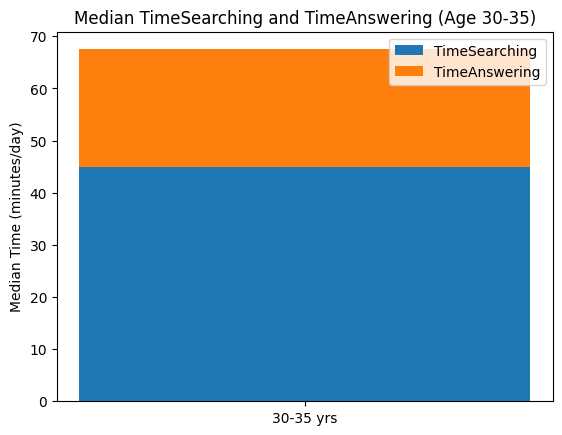

In [18]:
## Write your code here
df_copy = pd.read_sql_query("SELECT * FROM main;", conn)

# Step 1: Filter the age group 25-34 years old (approx 30-35)
df_age = df_copy[df_copy['Age'] == '25-34 years old']

# Step 2: Map time categories to numeric values (median of the range)
time_map = {
    'Less than 15 minutes a day': 7.5,
    '15-30 minutes a day': 22.5,
    '30-60 minutes a day': 45,
    '60-120 minutes a day': 90,
    'Over 120 minutes a day': 150
}

df_age['TimeSearching_num'] = df_age['TimeSearching'].map(time_map)
df_age['TimeAnswering_num'] = df_age['TimeAnswering'].map(time_map)

# Step 3: Calculate median
median_searching = df_age['TimeSearching_num'].median()
median_answering = df_age['TimeAnswering_num'].median()

# Step 4: Plot stacked bar chart
plt.bar(['30-35 yrs'], [median_searching], label='TimeSearching')
plt.bar(['30-35 yrs'], [median_answering], bottom=[median_searching], label='TimeAnswering')

plt.ylabel('Median Time (minutes/day)')
plt.title('Median TimeSearching and TimeAnswering (Age 30-35)')
plt.legend()
plt.show()


### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


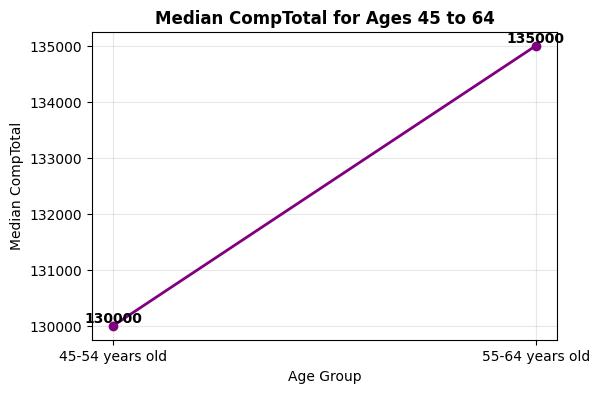

In [19]:
df_copy = pd.read_sql_query(
    "SELECT CompTotal, Age FROM main WHERE Age IN ('45-54 years old','55-64 years old');", 
    conn
)

# Calculate median CompTotal per age group and sort
age_order = ['45-54 years old', '55-64 years old']
median_comp = (
    df_copy.groupby('Age', as_index=False)['CompTotal'].median()
    .assign(Age=lambda x: pd.Categorical(x['Age'], categories=age_order, ordered=True))
    .sort_values('Age')
)

# Plot
plt.figure(figsize=(6,4))
plt.plot(median_comp['Age'], median_comp['CompTotal'], marker='o', color='purple', linewidth=2)

# Annotate median values
for x, y in zip(median_comp['Age'], median_comp['CompTotal']):
    plt.text(x, y, f'{y:.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Median CompTotal for Ages 45 to 64', fontsize=12, fontweight='bold')
plt.xlabel('Age Group')
plt.ylabel('Median CompTotal')
plt.grid(alpha=0.3)
plt.show()

**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


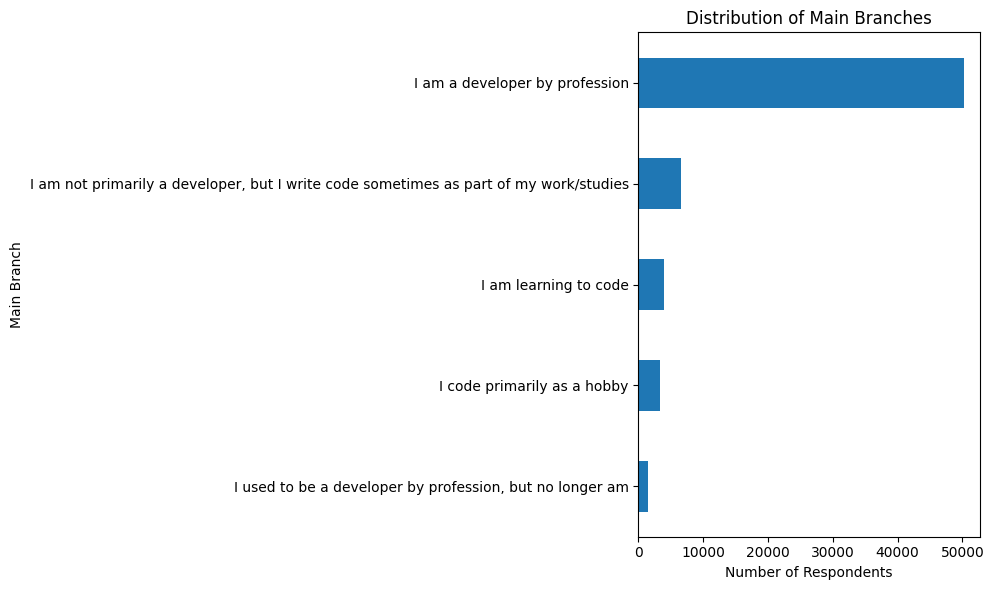

In [21]:
import matplotlib.pyplot as plt

# Copy the DataFrame
df_copy = pd.read_sql_query("SELECT * FROM main;", conn)

# Get value counts
main_branch_counts = df_copy['MainBranch'].value_counts()

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
main_branch_counts.plot(kind='barh')
plt.xlabel('Number of Respondents')
plt.ylabel('Main Branch')
plt.title('Distribution of Main Branches')
plt.gca().invert_yaxis()  # Highest count on top
plt.tight_layout()
plt.show()


### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [22]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
